In [1]:
# Standard Librarys
import pandas as pd
import numpy as np

# Data Visualization Librarys
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import squarify

# Stats library
import scipy.stats as sct

# defining data paths
path_portfolio_ofertas = 'dados/portfolio_ofertas.csv'
path_eventos_ofertas = 'dados/eventos_ofertas.csv'

# Dicionario de cores
primary_blue = "#496595"
primary_grey = "#c6ccd8"

In [2]:
data_ofertas = pd.read_csv(path_portfolio_ofertas)
data_ofertas.drop('Unnamed: 0', axis=1, inplace=True)
data_ofertas.rename(columns={'id':'id_oferta'}, inplace=True)
data_ofertas.head(3)

,recompensa,canal,valor_minimo,duracao,id_oferta,oferta
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,"compre 1, leve 2"
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,"compre 1, leve 2"
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informativo


In [3]:
data_eventos = pd.read_csv(path_eventos_ofertas, encoding='latin-1')
data_eventos.head()

,Unnamed: 0,cliente,tempo_decorrido,valor,id_oferta,recompensa,tipo_evento
0,1,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida
1,2,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
2,3,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida
3,4,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida
4,5,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida


In [4]:
inner = pd.merge(data_eventos, data_ofertas , on='id_oferta')
inner

,Unnamed: 0,cliente,tempo_decorrido,valor,id_oferta,recompensa_x,tipo_evento,recompensa_y,canal,valor_minimo,duracao,oferta
0,1,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5,"[web, email, mobile]",5,7,"compre 1, leve 2"
1,19,ebe7ef46ea6f4963a7dd49f501b26779,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5,"[web, email, mobile]",5,7,"compre 1, leve 2"
2,22,f082d80f0aac47a99173ba8ef8fc1909,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5,"[web, email, mobile]",5,7,"compre 1, leve 2"
3,29,c0d210398dee4a0895b24444a5fcd1d2,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5,"[web, email, mobile]",5,7,"compre 1, leve 2"
4,31,57dd18ec5ddc46828afb81ec5977bef2,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5,"[web, email, mobile]",5,7,"compre 1, leve 2"
...,...,...,...,...,...,...,...,...,...,...,...,...
167576,306001,642b6f1bf61040efb73e1859cf00e79e,714,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,oferta visualizada,0,"[email, mobile, social]",0,3,informativo
167577,306420,5a3f7fcb450a4cb693ab5267b4d49b40,714,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,oferta visualizada,0,"[email, mobile, social]",0,3,informativo
167578,306434,ec1761735b034ae8874bc979f0cd5862,714,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,oferta visualizada,0,"[email, mobile, social]",0,3,informativo
167579,306442,d56386cf344c4829bbf420d1895dca37,714,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,oferta visualizada,0,"[email, mobile, social]",0,3,informativo


In [10]:
inner.tipo_evento.value_counts()

oferta recebida       76277
oferta visualizada    57725
oferta concluída      33579
Name: tipo_evento, dtype: int64

In [29]:
inner.oferta.value_counts()

compre 1, leve 2    71617
desconto            69898
informativo         26066
Name: oferta, dtype: int64

In [11]:
campanha_1_l2 = inner[(inner['oferta'] == 'compre 1, leve 2') & (inner['tipo_evento'] == 'oferta concluída')]
campanha_1_l2.recompensa_y.sum()

113440

In [12]:
## Open Rate
# Total de possiveis açoes nos emails:
lista_recebidos = inner[inner['tipo_evento'] == 'oferta recebida']
lista_visualizados = inner[inner['tipo_evento'] == 'oferta visualizada']
lista_concluida = inner[inner['tipo_evento'] == 'oferta concluída']

# Filtrando e contando quantas vezes um usuario realizou cada açao (abrir, receber, concluir)
qntd_recebidos = lista_recebidos.groupby('cliente').tipo_evento.count().reset_index()
qntd_views =  lista_visualizados.groupby('cliente').tipo_evento.count().reset_index()
qntd_concluidos = lista_concluida.groupby('cliente').tipo_evento.count().reset_index()

contagem_emails_abertos = qntd_views['tipo_evento'].count()
qntd_emails = qntd_recebidos['tipo_evento'].sum()

open_rate = (contagem_emails_abertos / qntd_emails)*100
open_rate
# Um open rate unico muito bom!

22.06956225336602

### Segmentaçao de usuarios: R.F.M
<p>Para a segmentaçao de usuarios, eu decidi usar um modelo chamado de R.F.M, ele basicamente agrupa os clientes em segmentos a partir de uma nota, que e composta pela</p>
<ul>
    <li>Recencia: Quanto tempo um cliente esta sem interagir</li>
    <li>Frequencia: Quantas vezes o cliente interagiu</li>
    <li>Moneatry: Quanto em valor Monetario o cliente gastou nas suas compras</li>
</ul>

#### Quais as vantagens de utilizarmos o modelo R.F.M para a segmentaçao de clientes?
<p>
Uma analise detalhada da nossa carteira de dados revela quais sao os clientes mais importantes e quais clientes sao mais ativos e evitar perdelos e essencial para manter o negocio forte assim como entender se temos clientes com potenciais Expansões
</p>

In [5]:
## Tratamento de dados para uma futura clusterizaçao! 
# Cauculando a recencia de cada cliente
df_recencia = inner.groupby('cliente').tempo_decorrido.max().reset_index()
# Cauculando o valor monetario gasto por cada cliente
df_valor_monetario = data_eventos.groupby('cliente').valor.sum().reset_index()

# frequencia -> valor > 0 = uma compra realizada
df_frequencia = data_eventos.groupby('cliente').valor.count().reset_index()
df_frequencia.rename(columns={'valor':'frequencia'}, inplace=True)

df_usuario = pd.merge(df_recencia, df_valor_monetario, on='cliente')
df_usuario = pd.merge(df_usuario, df_frequencia, on='cliente')
# coluna tempo_decorrido em horas!
df_usuario

,cliente,tempo_decorrido,valor,frequencia
0,0009655768c64bdeb2e877511632db8f,576,127.60,8
1,00116118485d4dfda04fdbaba9a87b5c,630,4.09,3
2,0011e0d4e6b944f998e987f904e8c1e5,576,79.46,5
3,0020c2b971eb4e9188eac86d93036a77,660,196.86,8
4,0020ccbbb6d84e358d3414a3ff76cffd,600,154.05,12
...,...,...,...,...
16989,fff3ba4757bd42088c044ca26d73817a,576,580.98,11
16990,fff7576017104bcc8677a8d63322b5e1,594,29.94,6
16991,fff8957ea8b240a6b5e634b6ee8eafcf,660,12.15,5
16992,fffad4f4828548d1b5583907f2e9906b,666,88.83,12


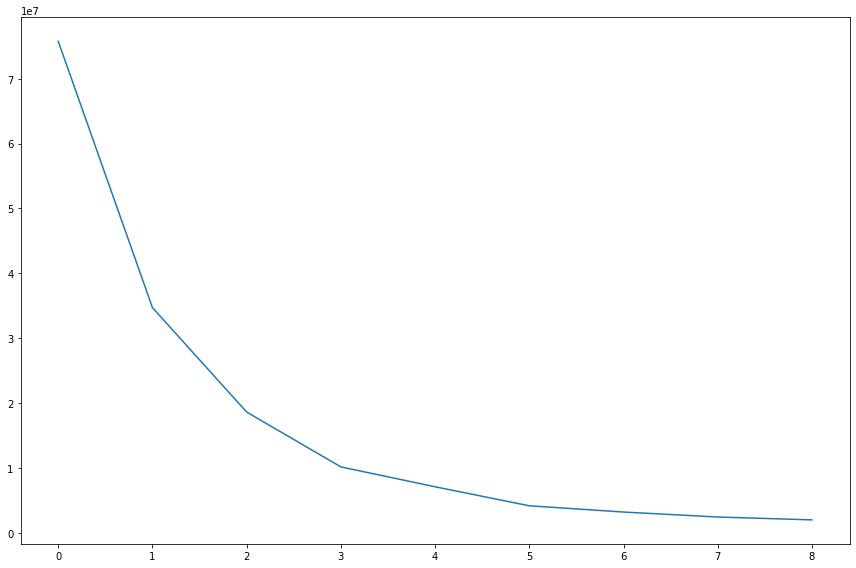

In [6]:
from sklearn.cluster import KMeans
import math

import warnings
warnings.filterwarnings("ignore") # apenas porque ao caucular a innertia dos clusters em um loop vem alguns warnings!

def calcular_wcss(data):
    wcss = []
    # encontrando o valor da innertia entre 10 clusters
    for k in range(1, 10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
        
    # Plotando o grafico da innertia
    plt.figure(figsize=(12,8))
    plt.plot(wcss) 
    plt.tight_layout()
    return wcss

recencia = df_usuario[['tempo_decorrido']]
quadrados = calcular_wcss(recencia)

In [47]:
df_usuario.describe()

,tempo_decorrido,valor,frequencia
count,16994.000000,16994.000000,16994.000000
mean,589.569730,104.460478,8.175415
std,66.771381,125.937868,5.116291
min,0.000000,0.000000,0.000000
25%,576.000000,21.820000,4.000000
50%,588.000000,69.415000,7.000000
75%,624.000000,148.827500,11.000000
max,714.000000,1608.690000,36.000000


In [7]:
def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20,wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0-(x2 - x1)*y0 + x2*y1-y2*x1)
        denominador = math.sqrt((y2 - y1)**2 +(x2- x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 1

n = numero_otimo_clusters(quadrados)
n
# Incluir a analise dos valores de Silhouette, Davie-bouldin, Calinski

4

In [8]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(recencia)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1
1,00116118485d4dfda04fdbaba9a87b5c,630,4.09,3,0
2,0011e0d4e6b944f998e987f904e8c1e5,576,79.46,5,1
3,0020c2b971eb4e9188eac86d93036a77,660,196.86,8,0
4,0020ccbbb6d84e358d3414a3ff76cffd,600,154.05,12,1


In [13]:
def ordena_clusters(cluster_nome, target_nome, df):
    '''
    Funçao que permite ordernar de forma crescente os clusters gerados,
    a fim de colocar o maior cluster aos usuarios que possuem os maiores valores para
    o Valor monetario, Frequencia e um menor valor para a Recencia
    '''
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome, ascending=True).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df , agrupado_por_cluster_ordenado[[cluster_nome, 'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome], axis=1)
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    
    return df_final


In [11]:
df_usuario = ordena_clusters('RecenciaCluster','tempo_decorrido', df_usuario)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1
1,0011e0d4e6b944f998e987f904e8c1e5,576,79.46,5,1
2,0020ccbbb6d84e358d3414a3ff76cffd,600,154.05,12,1
3,00426fe3ffde4c6b9cb9ad6d077a13ea,576,68.51,17,1
4,005500a7188546ff8a767329a2f7c76a,582,20.36,4,1


In [12]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['tempo_decorrido'].mean().reset_index().sort_values(by='tempo_decorrido', ascending=True)
agrupado_por_cluster

,RecenciaCluster,tempo_decorrido
3,3,381.991342
2,2,515.047178
1,1,590.850788
0,0,662.702562


In [14]:
freq = df_usuario[['frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(freq)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,3
1,0011e0d4e6b944f998e987f904e8c1e5,576,79.46,5,1,1
2,0020ccbbb6d84e358d3414a3ff76cffd,600,154.05,12,1,0
3,00426fe3ffde4c6b9cb9ad6d077a13ea,576,68.51,17,1,2
4,005500a7188546ff8a767329a2f7c76a,582,20.36,4,1,1


In [15]:
df_usuario = ordena_clusters('FrequenciaCluster','frequencia', df_usuario)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,1
1,008d7088107b468893889da0ede0df5c,606,16.18,7,1,1
2,0099bf30e4cb4265875266eb3eb25eab,576,105.83,9,1,1
3,009d10c2c38a4fd795a7bc6ddbbddb78,576,11.78,7,1,1
4,00ae03011f9f49b8a4b3e6d416678b0b,618,218.05,8,1,1


In [16]:
agrupado_por_cluster = df_usuario.groupby('FrequenciaCluster')['frequencia'].mean().reset_index().sort_values(by='frequencia', ascending=True)
agrupado_por_cluster

,FrequenciaCluster,frequencia
0,0,3.297731
1,1,7.789030
2,2,13.000000
3,3,19.791115


In [17]:
df_pagamento = df_usuario[['valor']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,1,3
1,008d7088107b468893889da0ede0df5c,606,16.18,7,1,1,1
2,0099bf30e4cb4265875266eb3eb25eab,576,105.83,9,1,1,3
3,009d10c2c38a4fd795a7bc6ddbbddb78,576,11.78,7,1,1,1
4,00ae03011f9f49b8a4b3e6d416678b0b,618,218.05,8,1,1,0


In [18]:
df_usuario = ordena_clusters('ReceitaCluster','valor', df_usuario)
df_usuario.head()

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,1,1
1,0099bf30e4cb4265875266eb3eb25eab,576,105.83,9,1,1,1
2,00b3400e4ff64ee68ce9ada1d0c222f0,606,163.92,10,1,1,1
3,00bc42a62f884b41a13cc595856cf7c3,618,150.64,8,1,1,1
4,00c20a9202d5475190b31a24de6fb06d,594,164.01,8,1,1,1


In [19]:
agrupado_por_cluster = df_usuario.groupby('ReceitaCluster')['valor'].mean().reset_index().sort_values(by='valor', ascending=True)
agrupado_por_cluster

,ReceitaCluster,valor
0,0,32.246425
1,1,143.531818
2,2,287.744959
3,3,842.455696


In [20]:
data_agrupamento = pd.read_csv('df_rfm_limpo_.csv')
data_agrupamento['pontuacao'] = (data_agrupamento['RecenciaCluster'] + 
                                 data_agrupamento['FrequenciaCluster']+
                                 data_agrupamento['ReceitaCluster'])
data_agrupamento.head(5)

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster,pontuacao
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,2,1,4
1,0099bf30e4cb4265875266eb3eb25eab,576,105.83,9,1,2,1,4
2,00b3400e4ff64ee68ce9ada1d0c222f0,606,163.92,10,1,2,1,4
3,00bc42a62f884b41a13cc595856cf7c3,618,150.64,8,1,2,1,4
4,00c20a9202d5475190b31a24de6fb06d,594,164.01,8,1,2,1,4


In [60]:
from sklearn import metrics
from sklearn.preprocessing import Normalizer

labels = kmeans.labels_
data_valores = data_agrupamento[['valor', 'pontuacao']]

values = Normalizer().fit_transform(data_valores.values)

calinski = metrics.calinski_harabasz_score(values, labels)
print(f'O valor de calinski e: {calinski}')

O valor de calinski e: 59.86196357492511


In [61]:
print(f'A maior pontuacao encontrada na nossa carteira de clientes é: {data_agrupamento.pontuacao.max()}')
print(f'A quantidade de pessoas com a maior pontuacao da nossa carteira é: {data_agrupamento[data_agrupamento["pontuacao"] == 11]["pontuacao"].count()}')

A maior pontuacao encontrada na nossa carteira de clientes é: 11
A quantidade de pessoas com a maior pontuacao da nossa carteira é: 2


In [62]:
# Setando todos os valores da coluna para inativo, em um primeiro momento
data_agrupamento['Segmento'] = 'Inativo'
# Criando uma segmentaçao onde, CASO a nota do cliente seja
data_agrupamento.loc[data_agrupamento['pontuacao']>= 2, 'Segmento'] = 'Bussines'
data_agrupamento.loc[data_agrupamento['pontuacao']>= 4, 'Segmento'] = 'Master'
data_agrupamento.loc[data_agrupamento['pontuacao']>= 7, 'Segmento'] = 'Premium'

In [63]:
melhores_clientes = data_agrupamento.loc[data_agrupamento['pontuacao']>=7]
print(f'Temos um total de {melhores_clientes.shape[0]} clientes que estao no grupo Premium')

Temos um total de 856 clientes que estao no grupo Premium


In [64]:
clientes_inativos = data_agrupamento[data_agrupamento['Segmento'] == 'Inativo']
clientes_bussines = data_agrupamento[data_agrupamento['Segmento'] == 'Bussines']
clientes_master   = data_agrupamento[data_agrupamento['Segmento'] == 'Master']
clientes_premium  = data_agrupamento[data_agrupamento['Segmento'] == 'Premium']

In [65]:
data_agrupamento

,cliente,tempo_decorrido,valor,frequencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster,pontuacao,Segmento
0,0009655768c64bdeb2e877511632db8f,576,127.60,8,1,2,1,4,Master
1,0099bf30e4cb4265875266eb3eb25eab,576,105.83,9,1,2,1,4,Master
2,00b3400e4ff64ee68ce9ada1d0c222f0,606,163.92,10,1,2,1,4,Master
3,00bc42a62f884b41a13cc595856cf7c3,618,150.64,8,1,2,1,4,Master
4,00c20a9202d5475190b31a24de6fb06d,594,164.01,8,1,2,1,4,Master
...,...,...,...,...,...,...,...,...,...
16989,174fee0b94e54cc3b1904965d2fb1209,672,615.86,2,0,0,3,3,Bussines
16990,3e2654232d3c479e88b817fbf3cf6ee1,642,495.89,3,0,0,3,3,Bussines
16991,7561a0a081e64e118bbc78818c890ab7,696,664.05,4,0,0,3,3,Bussines
16992,9250d51a392f4f2691eabff6851dcf66,540,497.35,4,2,0,3,5,Master


In [26]:
rfm_level_agg = data_agrupamento.groupby('Segmento').agg({
    'tempo_decorrido': 'mean',
    'frequencia': 'mean',
    'valor': ['mean', 'count'],
}).round(1)
# Print the agg dataset
print(rfm_level_agg)
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()

         tempo_decorrido frequencia  valor      
                    mean       mean   mean count
Segmento                                        
Bussines           591.6        6.4   63.1  6382
Inativo            617.6        3.0   28.7  3533
Master             578.5       11.8  154.0  6223
Premium            539.4       15.9  365.1   856


In [27]:
rfm_level_agg

,mean,mean,mean,count
Segmento,,,,
Bussines,591.6,6.4,63.1,6382
Inativo,617.6,3.0,28.7,3533
Master,578.5,11.8,154.0,6223
Premium,539.4,15.9,365.1,856


### Analise dos Segmentos gerados

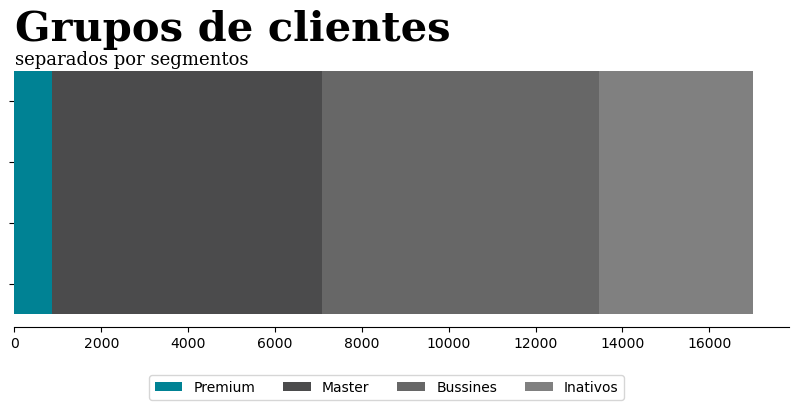

In [67]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,16)) # create figure
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])

plt.rcdefaults()
width = 0.99

ax0.barh(rfm_level_agg.index, rfm_level_agg['count'][3],
       color="#008294", zorder=3, label="Premium", height=1
)
ax0.barh(rfm_level_agg.index, rfm_level_agg['count'][2], 
       left=rfm_level_agg['count'][3],
       color="#4b4b4c", zorder=3, label="Master",height=1
)
ax0.barh(rfm_level_agg.index, rfm_level_agg['count'][0], 
       left=rfm_level_agg['count'][2]+rfm_level_agg['count'][3],
       color="#676767", zorder=3, label="Bussines",height=1
)
ax0.barh(rfm_level_agg.index, rfm_level_agg['count'][1], 
       left=rfm_level_agg['count'][0]+rfm_level_agg['count'][2]+rfm_level_agg['count'][3],
       color="#808080", zorder=3, label="Inativos",height=1
)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.48, -0.3))
ax0.set_yticklabels([]);


ax0.text(10, 4, 
         'Grupos de clientes', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif');

ax0.text(11, 3.6, 
         'separados por segmentos', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif');

In [68]:
data_agrupamento['Segmento'].value_counts(normalize=True)*100

Bussines    37.554431
Master      36.618807
Inativo     20.789690
Premium      5.037072
Name: Segmento, dtype: float64

<p> Apos a segmentaçao percebemos que ~74% de nossos clientes esta entre o segmento Bussines e Master</p>


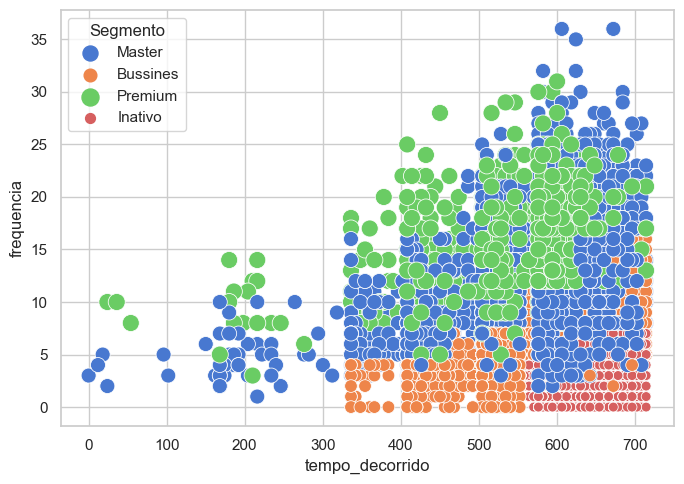

In [69]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y=y, hue='Segmento',data=data,size='Segmento',
                    sizes=(50, 150), size_order=['Premium','Master','Bussines','Inativo'])
    plt.tight_layout()
    
plot_segmento('tempo_decorrido', 'frequencia', data=data_agrupamento)

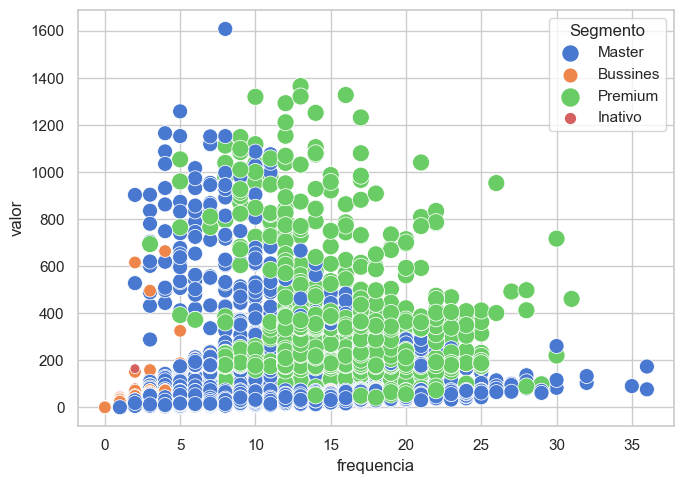

In [70]:
plot_segmento('frequencia', 'valor', data=data_agrupamento)

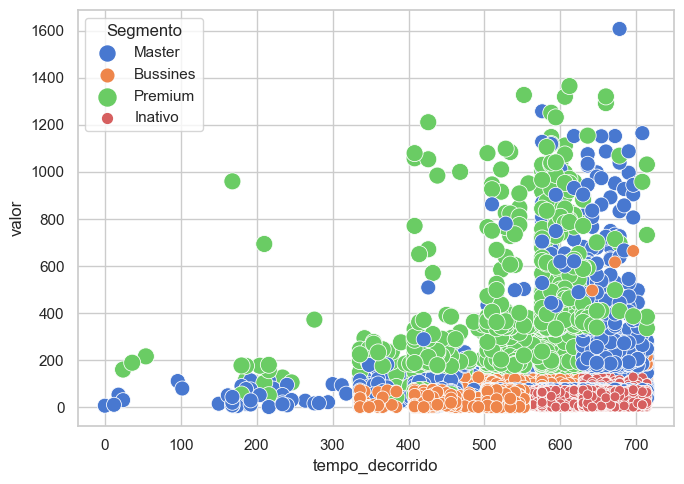

In [71]:
plot_segmento('tempo_decorrido', 'valor', data=data_agrupamento)

<ul> 
    <li>Clientes que compram muito mas com um ticket medio baixo sao considerados Master</li>
    <li>Clientes que compram pouco com uma frequencia baixa foram marcados como inativos</li>
    <li>Clientes com um ticket medio alto e uma frequencia nao tao alta foram marcados como Premium, que sao considerados nossos melhores clientes! </li>
</ul>

In [72]:
data_agrupamento.groupby('Segmento').agg({
    'valor':'mean',
    'tempo_decorrido':'mean',
    'frequencia':'mean'}).sort_values(by='valor')

,valor,tempo_decorrido,frequencia
Segmento,,,
Inativo,28.718757,617.633173,2.982734
Bussines,63.120939,591.566907,6.446412
Master,154.007357,578.487546,11.836574
Premium,365.084556,539.418224,15.882009


<p>Um padrao pode ser observado tambem, cada cliente considerado de um grupo superior vale ~2.3x mais do que um cliente do grupo inferior</p>

## Recomendaçoes de açoes gerais:
<p> </p>

<p>coletar um feedback do cliente, para analisar como ele avalia todo o processo, se ele sente falta de algo, principalmente nos grupos extremos(Inativos e Premium) para entender quais pontos mantem um cliente fiel ao nossos produtos</p>

<p>Construir uma comunidade, um canal no youtube contando um pouco sobre o produto, historia, diferencial, algumas receitas que pode ser feitas utilzando o produto, a fim de gerar autoridade no assunto, e tambem expandir o branding da empresa</p>

<p>Incluir mais dados a analise, informaçoes como data de saida de um cliente, um trecho do cabeçalho do email e do proprio texto em si para uma posterior analise de como o copywriting funciona para os diferentes seguimentos</p>

## Recomendaçoes de açoes por Cluster:
### Inativos:
<p>1. Criar algum tipo de workshop ou evento explicando um pouco do produto/diferencial</p>
<p>2. Politica de preços agressivas para tentar recuperar os clientes </p>
<p>3. Uma News-letter com promoçoes diarias para os usuarios </p>
<p>4. Enviar Emails mostrando alguma novidade/ produto novo </p>

### Bussines:
<p>1. Cross sell de produtos</p>
<p>2. Emails programados para um disparo 'constante' com ofertas de descontos pode ajudar nas vendas</p>
<p>3. Uma News-letter com receitas de comidas que podem ser feitas utilizando as palletas </p>

### Master:
<p>1. Atendimento priritario em emails e no S.A.C</p>
<p>2. Ofertas de Up-sell de produtos</p>
<p>3. Enviar ofertas de aniversario pode ajudar a aumentar a fidelidade do cliente desse grupo</p>

### Premium:
<p>1. Para os nossos melhores clientes, algum tipo de programa de fidelidade exclusivo, ou de ofertas limitadas pode ser implementado</p>
<p>2. Um atendimento diferenciado, algum desconto na data de aniversario, ao ligar no S.A.C da companhia deve ter atendimento priotitario </p>
<p>3. Uma cultura de feedback constante pode ser a chave para manter os clientes premiums por muito tempo consco</p>